In [ ]:
# import os
# from kaggle.api.kaggle_api_extended import KaggleApi

# # Authenticate and initialize Kaggle API
# api = KaggleApi()
# api.authenticate()

# # Download the dataset
# dataset_name = "ghazalihicham/brain-tumor-dataset"
# download_path = "brain_tumor_dataset"
# os.makedirs(download_path, exist_ok=True)
# api.dataset_download_files(dataset_name, path=download_path, unzip=True)

# print("Path to dataset files:", os.path.abspath(download_path))


ModuleNotFoundError: No module named 'kaggle'

In [1]:
#for organizaing the dataset

import os
import shutil
import random

# Path to your original TestData folder
dataset_dir = 'TestData'

# New base folder where splits will go
base_dir = 'brain_tumor_split'

# Define split ratios
train_split = 0.7
val_split = 0.15
test_split = 0.15

# Classes (subfolders)
classes = ['yes', 'no']

for cls in classes:
    # Create new folders
    os.makedirs(os.path.join(base_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'test', cls), exist_ok=True)

    # List all images inside the class folder
    files = os.listdir(os.path.join(dataset_dir, cls))
    files = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]  # Make sure it's an image
    random.shuffle(files)

    train_size = int(train_split * len(files))
    val_size = int(val_split * len(files))

    train_files = files[:train_size]
    val_files = files[train_size:train_size + val_size]
    test_files = files[train_size + val_size:]

    # Copy files into train/val/test folders
    for f in train_files:
        src = os.path.join(dataset_dir, cls, f)
        dst = os.path.join(base_dir, 'train', cls, f)
        shutil.copyfile(src, dst)

    for f in val_files:
        src = os.path.join(dataset_dir, cls, f)
        dst = os.path.join(base_dir, 'val', cls, f)
        shutil.copyfile(src, dst)

    for f in test_files:
        src = os.path.join(dataset_dir, cls, f)
        dst = os.path.join(base_dir, 'test', cls, f)
        shutil.copyfile(src, dst)

print("✅ Splitting complete! Files have been copied into 'brain_tumor_split/'.")


✅ Splitting complete! Files have been copied into 'brain_tumor_split/'.


In [ ]:
# Ensure TensorFlow is installed before importing
%pip install tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Also can add augmentation here
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from folders
train_generator = train_datagen.flow_from_directory(
    'brain_tumor_split/train',
    target_size=(128, 128),  # Resize all images to 128x128
    color_mode='grayscale',  # Your MRI images are probably grayscale
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'brain_tumor_split/val',
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'brain_tumor_split/test',
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important! Don't shuffle for test set
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 33.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 67.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 63.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip


2025-04-26 18:56:33.140056: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 18:56:33.180506: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 18:56:33.211489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745693793.243650    9810 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745693793.253486    9810 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745693793.318295    9810 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Found 112 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models
# make the CNN 
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'), #convolution blocks
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(), #falttens 3D output to 1D
    layers.Dense(128, activation='relu'), #128 neurons in the hidden layer
    layers.Dropout(0.5),  # To prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output neuron (0 or 1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# View model summary
model.summary()


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-26 19:05:57.940604: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#train the model using the training and validation data from the preprocessing step
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4375 - loss: 0.6879

2025-04-26 19:14:43.331108: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.5208 - loss: 0.6712

2025-04-26 19:14:43.577526: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2025-04-26 19:14:43.668084: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.5681 - loss: 0.6538

2025-04-26 19:14:43.903843: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2025-04-26 19:14:43.978208: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 414ms/step - accuracy: 0.6123 - loss: 0.6349 - val_accuracy: 0.7391 - val_loss: 0.8193
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.6963 - loss: 0.7028 - val_accuracy: 0.6957 - val_loss: 0.5968
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.8279 - loss: 0.4517 - val_accuracy: 0.7391 - val_loss: 0.6193
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.7932 - loss: 0.4424 - val_accuracy: 0.6957 - val_loss: 0.5777
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.7946 - loss: 0.4389 - val_accuracy: 0.6957 - val_loss: 0.6481
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step - accuracy: 0.7942 - loss: 0.3640 - val_accuracy: 0.7391 - val_loss: 0.7530
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.8265 - loss: 0.3988 - val_accuracy: 0.6957 - val_loss: 0.5674
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step - accuracy: 0.9230 - loss: 0.2982 - val_accuracy: 0.7826 - val_loss: 0.6735
Epo

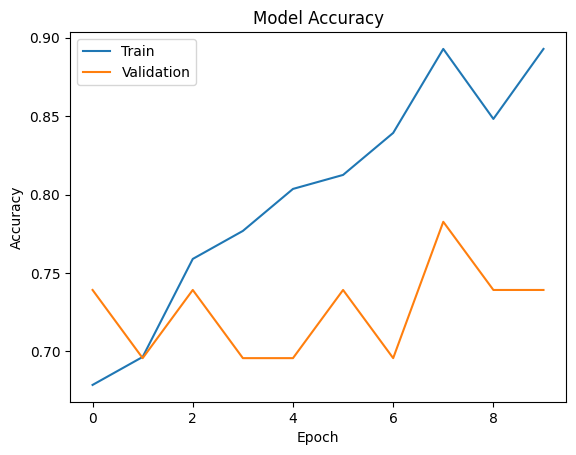

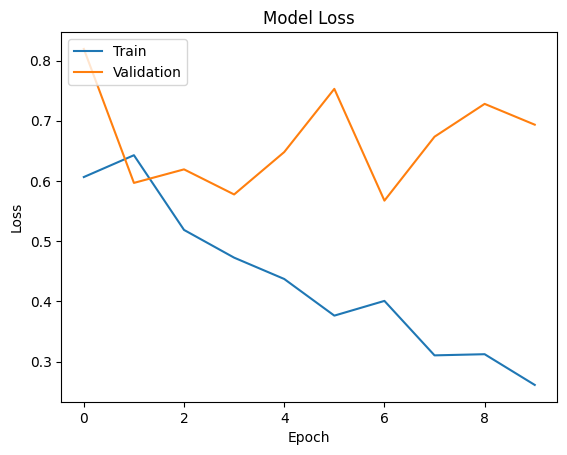

In [7]:
#plotting the model's learning curves

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [8]:
#adding checkpoints to save the best model 

from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
#

# Create a checkpoint callback
checkpoint = ModelCheckpoint(
    'best_model.h5',         # File to save the model
    monitor='val_accuracy',  # What to watch? (Validation Accuracy)
    save_best_only=True,     # Only save the best model
    mode='max',              # Higher accuracy = better
    verbose=1                # Print info when saving
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint]   
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9353 - loss: 0.1899
Epoch 1: val_accuracy improved from -inf to 0.78261, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.9339 - loss: 0.1940 - val_accuracy: 0.7826 - val_loss: 0.8389
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9266 - loss: 0.1977
Epoch 2: val_accuracy did not improve from 0.78261
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.9287 - loss: 0.1953 - val_accuracy: 0.6957 - val_loss: 0.7436
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.9078 - loss: 0.2424
Epoch 3: val_accuracy did not improve from 0.78261
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.9137 - loss: 0.2350 - val_accuracy: 0.7826 - val_loss: 0.6772
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9475 - loss: 0.1376
Epoch 4: val_accuracy did not improve from 0.78261
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.9473 - loss: 0.1378 - val_accuracy: 0.7826 - val_loss: 0.7793
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9841 - loss: 0.1173
Epoch 5: val_accuracy did not improve from 0.78261


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - accuracy: 0.9635 - loss: 0.0979 - val_accuracy: 0.8261 - val_loss: 0.9642
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9602 - loss: 0.0757
Epoch 7: val_accuracy did not improve from 0.82609
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.9592 - loss: 0.0769 - val_accuracy: 0.7391 - val_loss: 0.7854
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.9841 - loss: 0.0747
Epoch 8: val_accuracy did not improve from 0.82609
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.9837 - loss: 0.0758 - val_accuracy: 0.7391 - val_loss: 0.7459
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.9807 - loss: 0.0796
Epoch 9: val_accuracy did not improve from 0.82609
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.9810 - loss: 0.0786 - val_accuracy: 0.8261 - val_loss: 0.8470
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9740 - loss: 0.0641
Epoch 10: val_accuracy did not improve from 0.8260

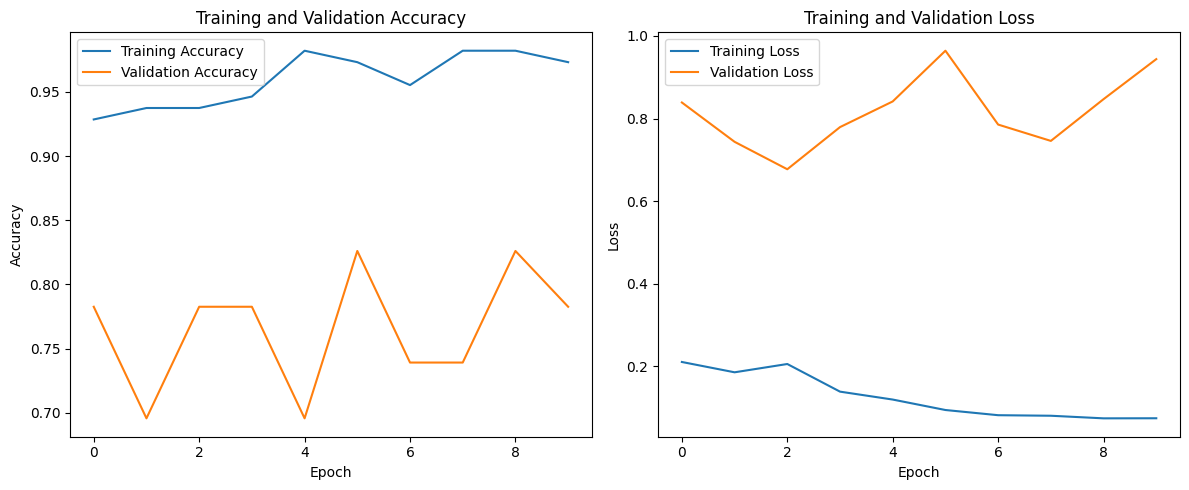

In [11]:


# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
#importing the best model and evaluating it on the test set 

from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('best_model.h5')

# Evaluate it
best_model.evaluate(test_generator)


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.7692 - loss: 0.6650


[0.6650046706199646, 0.7692307829856873]

In [16]:

#for preventing overfitting by rotating, shifting, zooming, and flipping the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,      # randomly rotate images
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1, # randomly shift images vertically
    zoom_range=0.1,         # randomly zoom images
    horizontal_flip=True,   # randomly flip images
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'brain_tumor_split',
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)


Found 161 images belonging to 3 classes.


In [18]:
#to fix overfitting since validation accuracy is lower than training accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Random rotations (degrees)
    width_shift_range=0.1,   # Random width shifts
    height_shift_range=0.1,  # Random height shifts
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Randomly flip images horizontally
    vertical_flip=True,      # Randomly flip vertically (MRI images can sometimes make sense flipped)
    shear_range=0.1,         # Slight shearing
    fill_mode='nearest'      # Fill missing pixels
)

# Only rescale validation and test data
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from folders
train_generator = train_datagen.flow_from_directory(
    'brain_tumor_split/train',
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'brain_tumor_split/val',
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'brain_tumor_split/test',
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 112 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [21]:
#retrain model with augmented data

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  # <-- You can now increase the number of epochs (30-50 is common with augmentation)
    callbacks=[checkpoint],  # <-- If you have a ModelCheckpoint setup, add it here
)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.5871 - loss: 1.3126
Epoch 1: val_accuracy did not improve from 0.82609
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.5893 - loss: 1.2603 - val_accuracy: 0.7826 - val_loss: 0.4735
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.5726 - loss: 0.6920
Epoch 2: val_accuracy did not improve from 0.82609
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - accuracy: 0.5795 - loss: 0.6863 - val_accuracy: 0.7391 - val_loss: 0.5168
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.7261 - loss: 0.5906
Epoch 3: val_accuracy did not improve from 0.82609
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.7130 - loss: 0.5952 - val_accuracy: 0.7826 - val_loss: 0.5466
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6597 - loss: 0.6094
Epoch 4: val_accuracy did not improve from 0.82609
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.6599 - loss: 0.6084 - val_accuracy: 0.7826 - val_loss: 0.5078


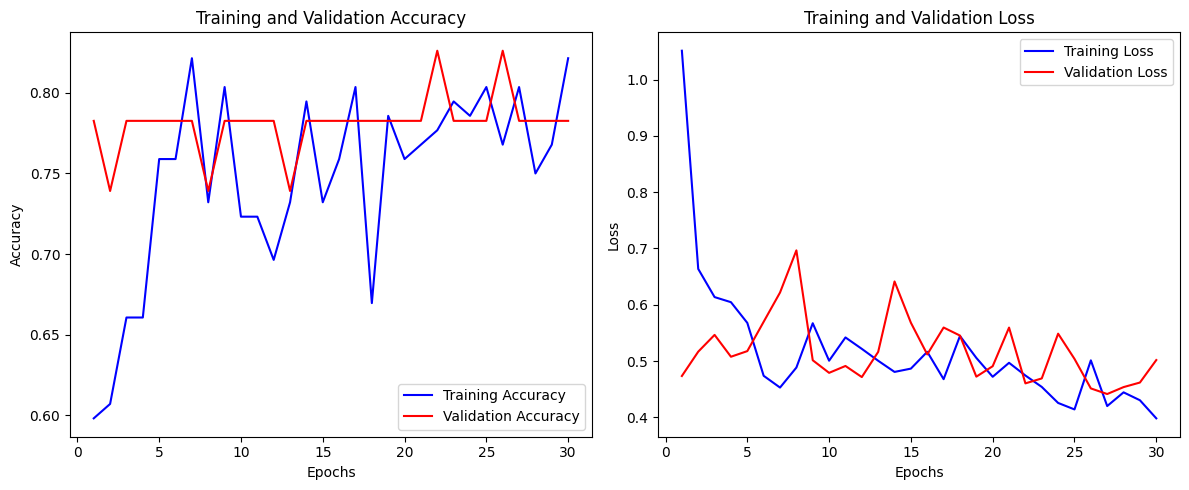

In [22]:
import matplotlib.pyplot as plt

# Get the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
#testing on test data

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7692 - loss: 0.4272
Test Accuracy: 0.7692
Test Loss: 0.4272


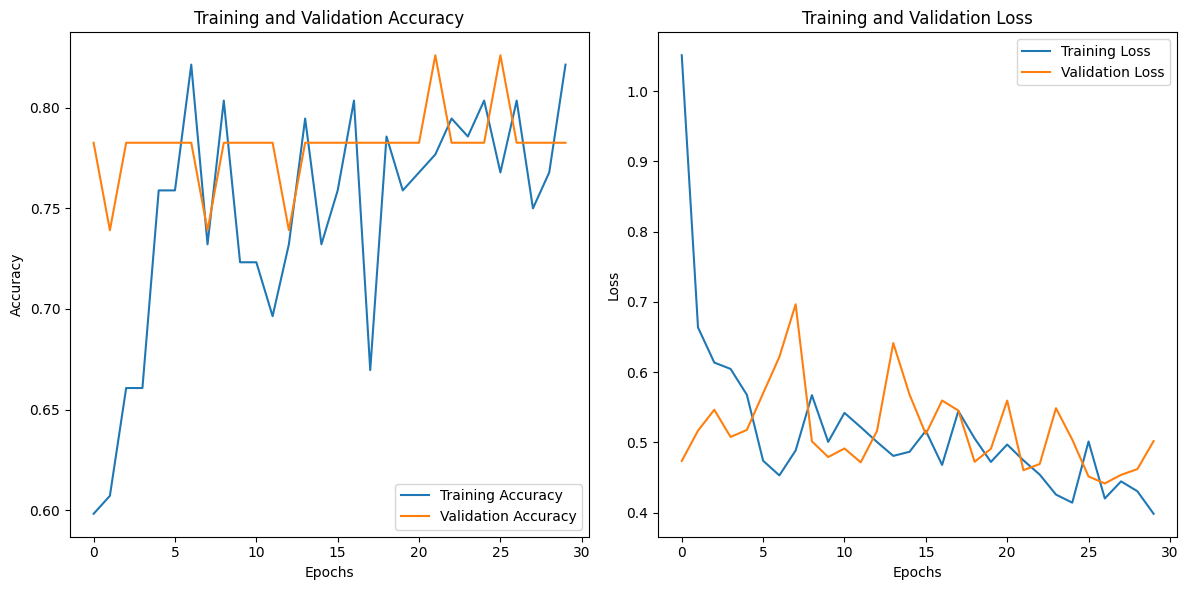

In [25]:
# Visualizing training history
history = model.history  # This stores the training history

# Accuracy plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display plots
plt.tight_layout()
plt.show()

In [28]:
#visualizing the test eval 

import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
test_images, test_labels = next(test_generator)  # Get a batch of test data
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Plot a few sample predictions vs true labels
num_samples = 5  # Set how many samples you want to visualize
plt.figure(figsize=(12, 12))

for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])  # Show the image
    plt.title(f"True: {true_labels[i]} | Pred: {predicted_labels[i]}")  # Display true and predicted labels
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optionally, calculate and display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(len(cm)), yticklabels=np.arange(len(cm)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


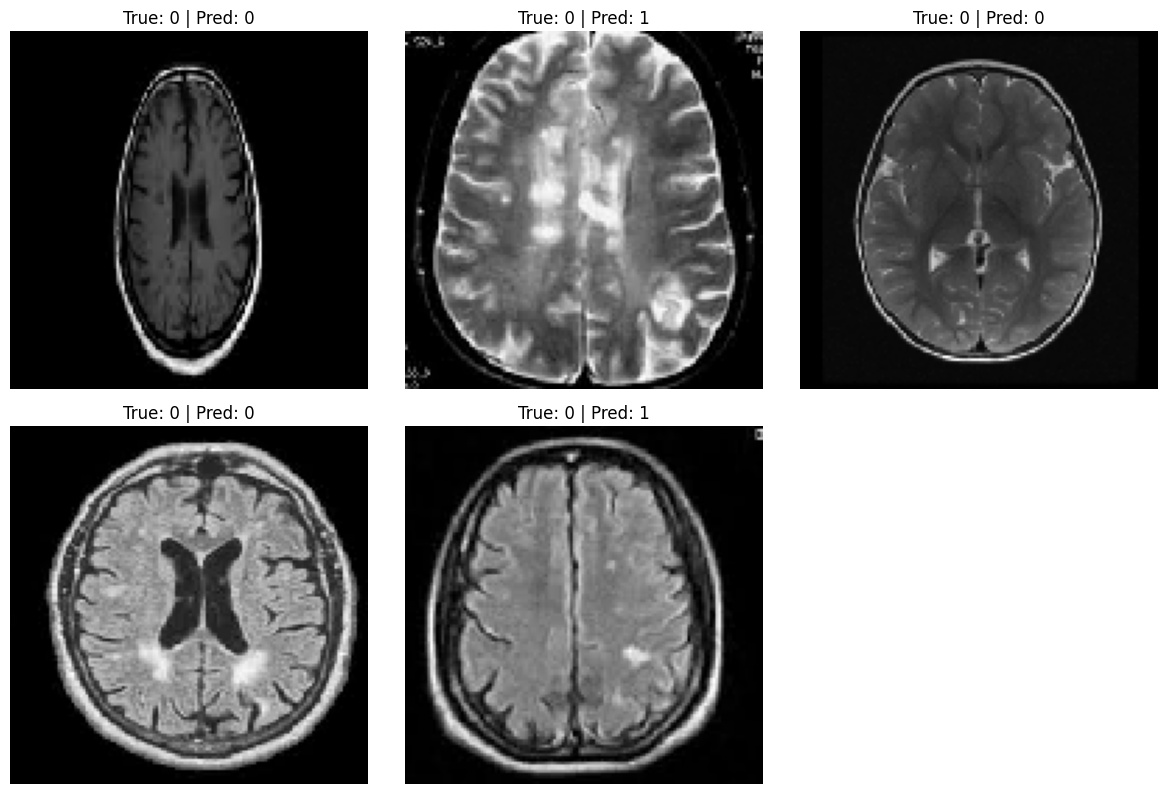

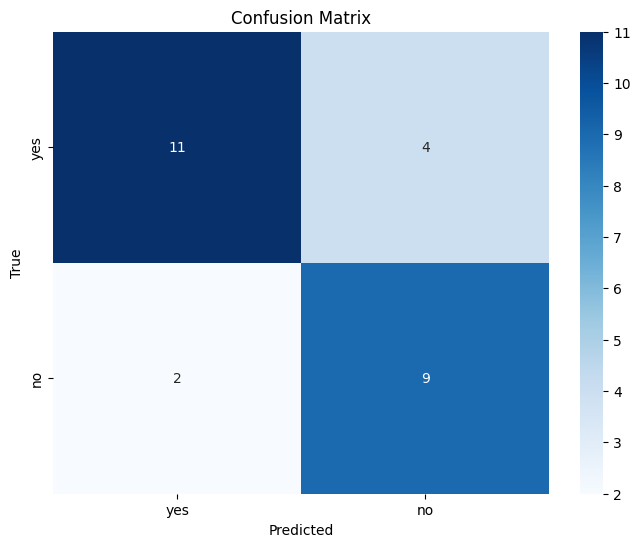

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the test set
test_images, test_labels = next(test_generator)  # Get a batch of test data
predictions = model.predict(test_images)

# Convert predictions to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Plot a few sample predictions vs true labels
num_samples = 5  # Set how many samples you want to visualize
plt.figure(figsize=(12, 12))

for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')  # Show the image
    plt.title(f"True: {int(test_labels[i])} | Pred: {predicted_labels[i]}")  # Display true and predicted labels
    plt.axis('off')

plt.tight_layout()
plt.show()

# Calculate and display confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
